In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lzma
import pickle

# Phase Diagram (k=-1)

In [2]:
#lambda=1
rho_cc_tab_1 = [1, 1.1, 0.635, 0.485,  0.28, 0.19, 0.137, 0.1, 0.075, 0.057, 0.044,
              0.033, 0.0255, 0.02, 0.01575, 0.0115, 0.009, 0.007]
rho_IT_tab_1 = [1, 0.479, 0.3500, 0.314, 0.2063, 0.1447, 0.106, 0.0792, 0.059, 0.0456, 0.0348,
              0.0266, 0.02036, 0.0156, 0.01217, 0.00933, 0.00717, 0.005585]
rho_sd_tab_1 = [0., 0.0, 0.055, 0.01, 0.0075, 0.005, 0.004, 0.002, 0.001, 0.001, 0.002,
              0.001, 0.0012, 0.001, 0.00075, 0.0005, 0.0005, 0.00025]
rho_sd_IT_tab_1 = [0., 0.01, 0.01, 0.01, 0.0075, 0.005, 0.004, 0.002, 0.001, 0.001, 0.002,
              0.001, 0.0012, 0.001, 0.00075, 0.0005, 0.0005, 0.00025]
al_tab_1 = np.array([2.425, 2.314, 2.6037,  2.7825594 ,   3.59381366,   4.64158883,   5.9948425 ,
         7.74263683,  10.        ,  12.91549665,  16.68100537,
        21.5443469 ,  27.82559402,  35.93813664,  46.41588834,
        59.94842503,  77.42636827, 100.        ])
al_tab_IT_1 = np.array([2.025,2.314, 2.6037,  2.7825594 ,   3.59381366,   4.64158883,   5.9948425 ,
         7.74263683,  10.        ,  12.91549665,  16.68100537,
        21.5443469 ,  27.82559402,  35.93813664,  46.41588834,
        59.94842503,  77.42636827, 100.        ])
#lambda=0.5
rho_cc_tab_1_l5 = [1.0, 0.85, 0.75,  0.47, 0.335, 0.236, 0.18, 0.140, 0.06, 0.046, 0.035, 0.027, 0.021, 0.016, 0.0125 ]
rho_IT_tab_1_l5 = [1.0 , 0.8, 0.575, 0.52, 0.36, 0.257, 0.192, 0.143, 0.11 , 0.049, 0.0375, 0.0295, 0.0225, 0.0175, 0.0135, 0.0105 ]
rho_sd_tab_1_l5 = [0.0,0.1, 0.03, 0.05, 0.02, 0.02, 0.01, 0.01, 0.0025, 0.001, 0.001, 0.001, 0.001, 0.001, 0.00075  ]
rho_sd_IT_tab_1_l5 = [0.0, 0.05, 0.03, 0.01, 0.01, 0.005, 0.005, 0.005, 0.003, 0.002, 0.001, 0.001, 0.001, 0.001, 0.00075, 0.0005 ]
al_tab_IT_1_l5 = np.array([2.025 , 2.2,  2.6, 2.7825594, 3.59381366, 4.64158883, 5.9948425, 7.74263683, 10.0, 21.5443469 , 27.82559402, 35.93813664, 46.41588834, 59.94842503,
  77.42636827, 100.])
al_tab_1_l5 = np.array([2.425, 2.6,  2.7825594, 3.59381366, 4.64158883, 5.9948425, 7.74263683, 10.0, 21.5443469 , 27.82559402, 35.93813664, 46.41588834, 59.94842503,
  77.42636827, 100.])

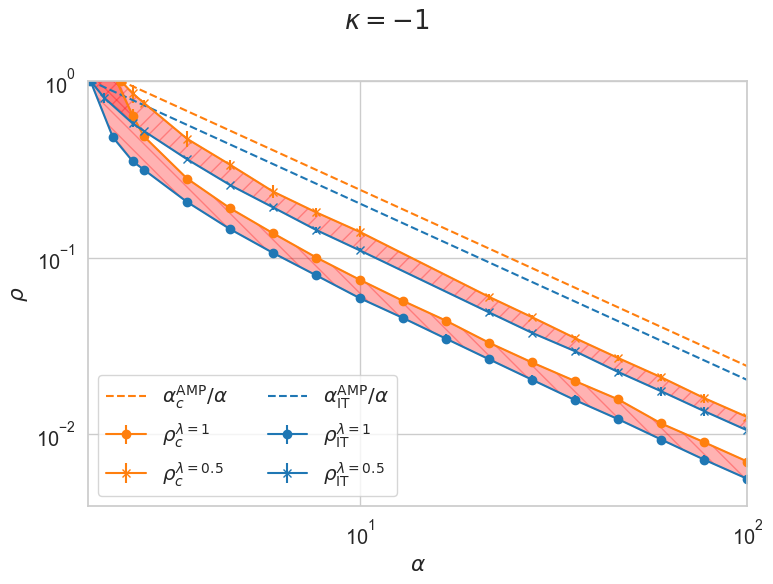

In [3]:
sns.set_theme(style="whitegrid", font_scale=1.3)
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle(r'$\kappa=-1$')
ax.plot(np.linspace(1,100,1000),2.425/np.linspace(1,100,1000),'--',label=r'$\alpha_c^{\rm AMP}/\alpha$', color='tab:orange')
ax.errorbar(al_tab_1,rho_cc_tab_1,yerr=rho_sd_tab_1,fmt='o-',label=r'$\rho_c^{\lambda=1}$', color='tab:orange')
ax.errorbar(al_tab_1_l5,rho_cc_tab_1_l5,yerr=rho_sd_tab_1_l5,fmt='x-',label=r'$\rho_c^{\lambda=0.5}$', color='tab:orange')
ax.plot(np.linspace(1,100,1000),2.025/np.linspace(1,100,1000),'--',label=r'$\alpha_{\rm IT}^{\rm AMP}/\alpha$', color='tab:blue')
#lambda=1

ax.errorbar(al_tab_IT_1,rho_IT_tab_1,yerr=rho_sd_IT_tab_1,fmt='o-',label=r'$\rho_{\rm IT}^{\lambda=1}$', color='tab:blue')
#lambda=0.5

ax.errorbar(al_tab_IT_1_l5,rho_IT_tab_1_l5,yerr=rho_sd_IT_tab_1_l5,fmt='x-',label=r'$\rho_{\rm IT}^{\lambda=0.5}$', color='tab:blue')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\rho$')
ax.set_ylim(plt.ylim()[0], 1)
ax.set_xlim(2., 100)
#ax.axvline(7.9573, color='red', linestyle='--', label=r'$\alpha=\alpha_{\rm AMP}$')
handles, labels = ax.get_legend_handles_labels()
orders = [0, 2, 3, 1, 4, 5]
handles = [handles[i] for i in orders]
labels = [labels[i] for i in orders]
ax.legend(handles, labels,ncol=2, loc='lower left')
plt.tight_layout()

x_start = 2.025
x_end = 100

x1 = al_tab_1
y1 = rho_cc_tab_1

x2 = al_tab_IT_1
y2 = rho_IT_tab_1

y_start = 1#y1[0] if x_start == x1[0] else y2[0]
y1_end = y1[-1] if x_end == x1[-1] else y2[-1]
y2_end = y2[-1]# if x_end == x1[-1] else y2[-1]

# Ensure all points from x1 and x2 are included in the interpolation
x_combined = sorted(set(np.r_[x_start, x1, x2, x_end]))
y1_combined = np.interp(x_combined, np.r_[x_start, x1, x_end], np.r_[y_start, y1, y1_end])
y2_combined = np.interp(x_combined, np.r_[x_start, x2, x_end], np.r_[y_start, y2, y2_end])

# Add the last point explicitly to ensure it is included
x_combined.append(x_end)
y1_combined = np.append(y1_combined, y1[-1])
y2_combined = np.append(y2_combined, y2[-1])

# Fill the area between the two interpolated curves
plt.fill_between(x_combined, y1_combined, y2_combined, color="red", alpha=0.3, hatch='\\\\')

x1 = al_tab_1_l5
y1 = rho_cc_tab_1_l5

x2 = al_tab_IT_1_l5
y2 = rho_IT_tab_1_l5

y_start = 1#y1[0] if x_start == x1[0] else y2[0]
y1_end = y1[-1] if x_end == x1[-1] else y2[-1]
y2_end = y2[-1]# if x_end == x1[-1] else y2[-1]

# Ensure all points from x1 and x2 are included in the interpolation
x_combined = sorted(set(np.r_[x_start, x1, x2, x_end]))
y1_combined = np.interp(x_combined, np.r_[x_start, x1, x_end], np.r_[y_start, y1, y1_end])
y2_combined = np.interp(x_combined, np.r_[x_start, x2, x_end], np.r_[y_start, y2, y2_end])

# Add the last point explicitly to ensure it is included
x_combined.append(x_end)
y1_combined = np.append(y1_combined, y1[-1])
y2_combined = np.append(y2_combined, y2[-1])
# Fill the area between the two interpolated curves
plt.fill_between(x_combined, y1_combined, y2_combined, color="red", alpha=0.3, hatch='//')
#fig.savefig('phase_diag_k1.png', dpi=400)

# Phase Diagram (k=-2)

In [4]:
#lambda=1
rho_cc_tab_2 = [1,0.2, 0.12, 0.086, 0.071] + [0.062, 0.038, 0.027, 0.02, 0.015, 0.0115, 0.00875, 0.00675, 0.005125 ]
rho_IT_tab_2 = [1,0.2, 0.14, 0.094, 0.077, 0.067, 0.062, 0.0575, 0.0519, 0.0469] + [0.043, 0.029, 0.021, 0.016, 0.01175, 0.009, 0.00675, 0.005125, 0.00405]
rho_sd_tab_2 = [0,0.05, 0.02, 0.007, 0.004]+ [0.004, 0.002, 0.001, 0.001, 0.0005, 0.0005, 0.0005, 0.00025, 0.00025]
rho_sd_IT_tab_2 = [0, 0.05, 0.025, 0.006, 0.004, 0.0025, 0.0025, 0.0016, 0.001, 0.001] + [0.004, 0.002, 0.001, 0.001, 0.0005, 0.0005, 0.0005, 0.00025, 0.00025]
al_tab_IT_2 = [8.6, 8.85, 9.1, 9.5, 10, 10.5, 10.8, 11.1, 11.7, 12.3] + [12.91549665,  16.68100537,  21.5443469 ,  27.82559402, 35.93813664,  46.41588834,  59.94842503,  77.42636827, 100.]
al_tab_2 = [10.6, 10.8, 11.1, 11.7, 12.3] + [12.91549665,  16.68100537,  21.5443469 ,  27.82559402, 35.93813664,  46.41588834,  59.94842503,  77.42636827, 100.]
#lambda=0.5
rho_cc_tab_2_l5 = [1, 0.45, 0.29 ,0.23, 0.1275, 0.0875, 0.062, 0.045, 0.03475, 0.026, 0.0205, 0.0155]
rho_IT_tab_2_l5 = [1, 0.64, 0.425, 0.305, 0.195 , 0.164, 0.1475, 0.095, 0.067, 0.048, 0.0365, 0.0275, 0.021, 0.016, 0.012]
rho_sd_tab_2_l5 = [0, 0.07 , 0.04 ,0.02, 0.005, 0.003, 0.002, 0.002, 0.0015, 0.001, 0.0001, 0.0001]
rho_sd_IT_tab_2_l5 = [0,0.05 ,0.04, 0.03, 0.015 , 0.009 ,0.0075, 0.004, 0.002, 0.0025, 0.0015, 0.001, 0.00075, 0.0005, 0.0005]
al_tab_IT_2_l5 = [8.6,9.04,9.51,10.,11.32, 12.1,  12.91549665,  16.68100537,  21.5443469 ,  27.82559402, 35.93813664,  46.41588834,  59.94842503,  77.42636827, 100.]
al_tab_2_l5 = [10.6,11.32,12.1, 12.91549665,  16.68100537,  21.5443469 ,  27.82559402, 35.93813664,  46.41588834,  59.94842503,  77.42636827, 100.]

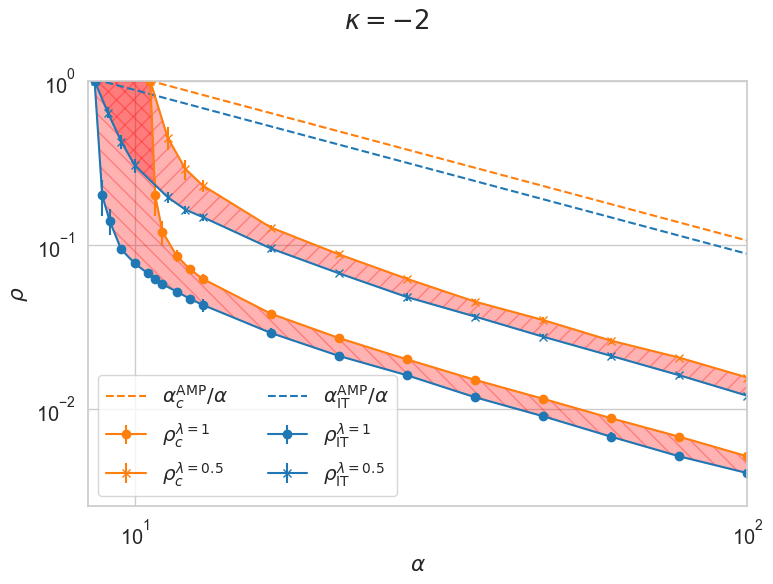

In [5]:
sns.set_theme(style="whitegrid", font_scale=1.3)
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle(r'$\kappa=-2$')
ax.plot(np.linspace(1,100,1000),10.6/np.linspace(1,100,1000),'--',label=r'$\alpha_c^{\rm AMP}/\alpha$', color='tab:orange')
ax.errorbar(al_tab_2,rho_cc_tab_2,yerr=rho_sd_tab_2,fmt='o-',label=r'$\rho_c^{\lambda=1}$', color='tab:orange')
ax.errorbar(al_tab_2_l5,rho_cc_tab_2_l5,yerr=rho_sd_tab_2_l5,fmt='x-',label=r'$\rho_c^{\lambda=0.5}$', color='tab:orange')
ax.plot(np.linspace(1,100,1000),8.8/np.linspace(1,100,1000),'--',label=r'$\alpha_{\rm IT}^{\rm AMP}/\alpha$', color='tab:blue')
#lambda=1

ax.errorbar(al_tab_IT_2,rho_IT_tab_2,yerr=rho_sd_IT_tab_2,fmt='o-',label=r'$\rho_{\rm IT}^{\lambda=1}$', color='tab:blue')
#lambda=0.5

ax.errorbar(al_tab_IT_2_l5,rho_IT_tab_2_l5,yerr=rho_sd_IT_tab_2_l5,fmt='x-',label=r'$\rho_{\rm IT}^{\lambda=0.5}$', color='tab:blue')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\rho$')
ax.set_ylim(plt.ylim()[0], 1)
ax.set_xlim(8.4, 100)
#ax.axvline(7.9573, color='red', linestyle='--', label=r'$\alpha=\alpha_{\rm AMP}$')
handles, labels = ax.get_legend_handles_labels()
orders = [0, 2, 3, 1, 4, 5]
handles = [handles[i] for i in orders]
labels = [labels[i] for i in orders]
ax.legend(handles, labels,ncol=2, loc='lower left')
plt.tight_layout()

x_start = 8.6
x_end = 100

x1 = al_tab_2
y1 = rho_cc_tab_2

x2 = al_tab_IT_2
y2 = rho_IT_tab_2

y_start = 1#y1[0] if x_start == x1[0] else y2[0]
y1_end = y1[-1] if x_end == x1[-1] else y2[-1]
y2_end = y2[-1]# if x_end == x1[-1] else y2[-1]

# Ensure all points from x1 and x2 are included in the interpolation
x_combined = sorted(set(np.r_[x_start, x1, x2, x_end]))
y1_combined = np.interp(x_combined, np.r_[x_start, x1, x_end], np.r_[y_start, y1, y1_end])
y2_combined = np.interp(x_combined, np.r_[x_start, x2, x_end], np.r_[y_start, y2, y2_end])

# Add the last point explicitly to ensure it is included
x_combined.append(x_end)
y1_combined = np.append(y1_combined, y1[-1])
y2_combined = np.append(y2_combined, y2[-1])

# Fill the area between the two interpolated curves
plt.fill_between(x_combined, y1_combined, y2_combined, color="red", alpha=0.3, hatch='\\\\')

x1 = al_tab_2_l5
y1 = rho_cc_tab_2_l5

x2 = al_tab_IT_2_l5
y2 = rho_IT_tab_2_l5

y_start = 1#y1[0] if x_start == x1[0] else y2[0]
y1_end = y1[-1] if x_end == x1[-1] else y2[-1]
y2_end = y2[-1]# if x_end == x1[-1] else y2[-1]

# Ensure all points from x1 and x2 are included in the interpolation
x_combined = sorted(set(np.r_[x_start, x1, x2, x_end]))
y1_combined = np.interp(x_combined, np.r_[x_start, x1, x_end], np.r_[y_start, y1, y1_end])
y2_combined = np.interp(x_combined, np.r_[x_start, x2, x_end], np.r_[y_start, y2, y2_end])

# Add the last point explicitly to ensure it is included
x_combined.append(x_end)
y1_combined = np.append(y1_combined, y1[-1])
y2_combined = np.append(y2_combined, y2[-1])

# Fill the area between the two interpolated curves
plt.fill_between(x_combined, y1_combined, y2_combined, color="red", alpha=0.3, hatch='//')

#fig.savefig('phase_diag_k2.png', dpi=400)

# Together

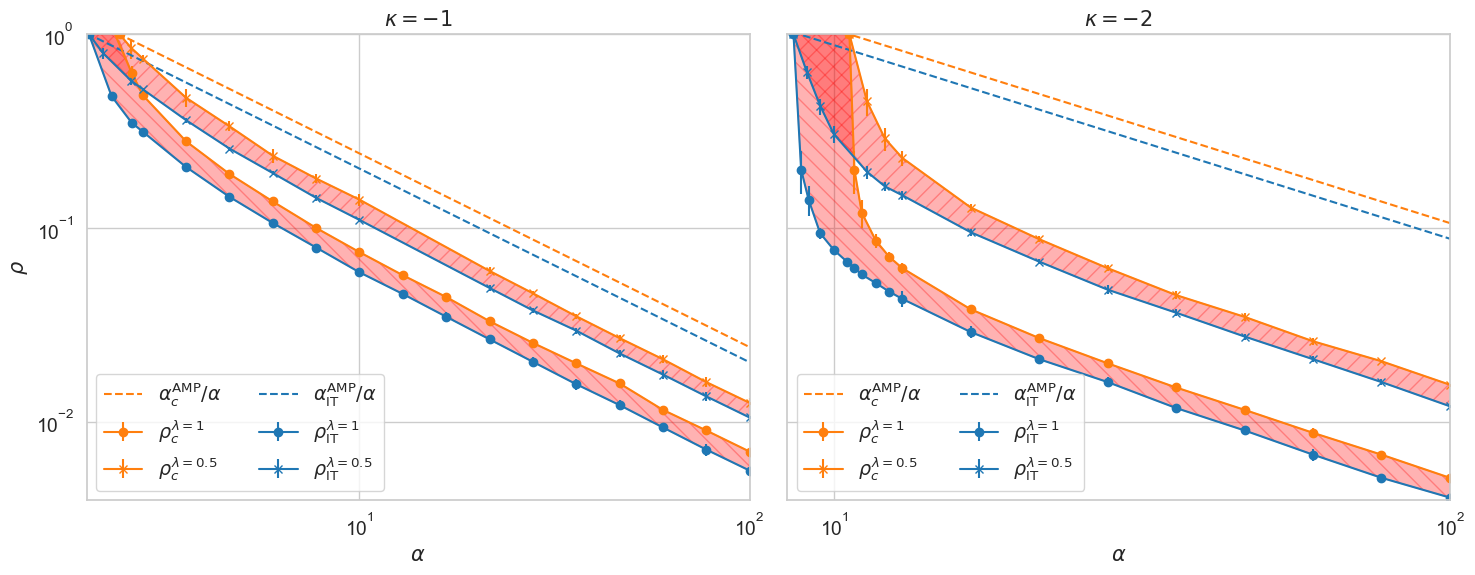

In [ ]:
sns.set_theme(style="whitegrid", font_scale=1.25)
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

ax=axs[0]

ax.set_title(r'$\kappa=-1$')
ax.plot(np.linspace(1,100,1000),2.425/np.linspace(1,100,1000),'--',label=r'$\alpha_c^{\rm AMP}/\alpha$', color='tab:orange')
ax.errorbar(al_tab_1,rho_cc_tab_1,yerr=rho_sd_tab_1,fmt='o-',label=r'$\rho_c^{\lambda=1}$', color='tab:orange')
ax.errorbar(al_tab_1_l5,rho_cc_tab_1_l5,yerr=rho_sd_tab_1_l5,fmt='x-',label=r'$\rho_c^{\lambda=0.5}$', color='tab:orange')
ax.plot(np.linspace(1,100,1000),2.025/np.linspace(1,100,1000),'--',label=r'$\alpha_{\rm IT}^{\rm AMP}/\alpha$', color='tab:blue')
#lambda=1

ax.errorbar(al_tab_IT_1,rho_IT_tab_1,yerr=rho_sd_IT_tab_1,fmt='o-',label=r'$\rho_{\rm IT}^{\lambda=1}$', color='tab:blue')
#lambda=0.5

ax.errorbar(al_tab_IT_1_l5,rho_IT_tab_1_l5,yerr=rho_sd_IT_tab_1_l5,fmt='x-',label=r'$\rho_{\rm IT}^{\lambda=0.5}$', color='tab:blue')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\rho$')
ax.set_ylim(plt.ylim()[0], 1)
ax.set_xlim(2., 100)
#ax.axvline(7.9573, color='red', linestyle='--', label=r'$\alpha=\alpha_{\rm AMP}$')
handles, labels = ax.get_legend_handles_labels()
orders = [0, 2, 3, 1, 4, 5]
handles = [handles[i] for i in orders]
labels = [labels[i] for i in orders]
ax.legend(handles, labels,ncol=2, loc='lower left')
#.tight_layout()

x_start = 2.025
x_end = 100

x1 = al_tab_1
y1 = rho_cc_tab_1

x2 = al_tab_IT_1
y2 = rho_IT_tab_1

y_start = 1#y1[0] if x_start == x1[0] else y2[0]
y1_end = y1[-1] if x_end == x1[-1] else y2[-1]
y2_end = y2[-1]# if x_end == x1[-1] else y2[-1]

# Ensure all points from x1 and x2 are included in the interpolation
x_combined = sorted(set(np.r_[x_start, x1, x2, x_end]))
y1_combined = np.interp(x_combined, np.r_[x_start, x1, x_end], np.r_[y_start, y1, y1_end])
y2_combined = np.interp(x_combined, np.r_[x_start, x2, x_end], np.r_[y_start, y2, y2_end])

# Add the last point explicitly to ensure it is included
x_combined.append(x_end)
y1_combined = np.append(y1_combined, y1[-1])
y2_combined = np.append(y2_combined, y2[-1])

# Fill the area between the two interpolated curves
ax.fill_between(x_combined, y1_combined, y2_combined, color="red", alpha=0.3, hatch='\\\\')

x1 = al_tab_1_l5
y1 = rho_cc_tab_1_l5

x2 = al_tab_IT_1_l5
y2 = rho_IT_tab_1_l5

y_start = 1#y1[0] if x_start == x1[0] else y2[0]
y1_end = y1[-1] if x_end == x1[-1] else y2[-1]
y2_end = y2[-1]# if x_end == x1[-1] else y2[-1]

# Ensure all points from x1 and x2 are included in the interpolation
x_combined = sorted(set(np.r_[x_start, x1, x2, x_end]))
y1_combined = np.interp(x_combined, np.r_[x_start, x1, x_end], np.r_[y_start, y1, y1_end])
y2_combined = np.interp(x_combined, np.r_[x_start, x2, x_end], np.r_[y_start, y2, y2_end])

# Add the last point explicitly to ensure it is included
x_combined.append(x_end)
y1_combined = np.append(y1_combined, y1[-1])
y2_combined = np.append(y2_combined, y2[-1])
# Fill the area between the two interpolated curves
ax.fill_between(x_combined, y1_combined, y2_combined, color="red", alpha=0.3, hatch='//')












ax = axs[1]
ax.set_title(r'$\kappa=-2$')
ax.plot(np.linspace(1,100,1000),10.6/np.linspace(1,100,1000),'--',label=r'$\alpha_c^{\rm AMP}/\alpha$', color='tab:orange')
ax.errorbar(al_tab_2,rho_cc_tab_2,yerr=rho_sd_tab_2,fmt='o-',label=r'$\rho_c^{\lambda=1}$', color='tab:orange')
ax.errorbar(al_tab_2_l5,rho_cc_tab_2_l5,yerr=rho_sd_tab_2_l5,fmt='x-',label=r'$\rho_c^{\lambda=0.5}$', color='tab:orange')
ax.plot(np.linspace(1,100,1000),8.8/np.linspace(1,100,1000),'--',label=r'$\alpha_{\rm IT}^{\rm AMP}/\alpha$', color='tab:blue')
#lambda=1

ax.errorbar(al_tab_IT_2,rho_IT_tab_2,yerr=rho_sd_IT_tab_2,fmt='o-',label=r'$\rho_{\rm IT}^{\lambda=1}$', color='tab:blue')
#lambda=0.5

ax.errorbar(al_tab_IT_2_l5,rho_IT_tab_2_l5,yerr=rho_sd_IT_tab_2_l5,fmt='x-',label=r'$\rho_{\rm IT}^{\lambda=0.5}$', color='tab:blue')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\alpha$')
#ax.set_ylabel(r'$\rho$')
ax.set_ylim(plt.ylim()[0], 1)
ax.set_xlim(8.4, 100)
#ax.axvline(7.9573, color='red', linestyle='--', label=r'$\alpha=\alpha_{\rm AMP}$')
handles, labels = ax.get_legend_handles_labels()
orders = [0, 2, 3, 1, 4, 5]
handles = [handles[i] for i in orders]
labels = [labels[i] for i in orders]
ax.legend(handles, labels,ncol=2, loc='lower left')
plt.tight_layout()

x_start = 8.6
x_end = 100

x1 = al_tab_2
y1 = rho_cc_tab_2

x2 = al_tab_IT_2
y2 = rho_IT_tab_2

y_start = 1#y1[0] if x_start == x1[0] else y2[0]
y1_end = y1[-1] if x_end == x1[-1] else y2[-1]
y2_end = y2[-1]# if x_end == x1[-1] else y2[-1]

# Ensure all points from x1 and x2 are included in the interpolation
x_combined = sorted(set(np.r_[x_start, x1, x2, x_end]))
y1_combined = np.interp(x_combined, np.r_[x_start, x1, x_end], np.r_[y_start, y1, y1_end])
y2_combined = np.interp(x_combined, np.r_[x_start, x2, x_end], np.r_[y_start, y2, y2_end])

# Add the last point explicitly to ensure it is included
x_combined.append(x_end)
y1_combined = np.append(y1_combined, y1[-1])
y2_combined = np.append(y2_combined, y2[-1])

# Fill the area between the two interpolated curves
plt.fill_between(x_combined, y1_combined, y2_combined, color="red", alpha=0.3, hatch='\\\\')

x1 = al_tab_2_l5
y1 = rho_cc_tab_2_l5

x2 = al_tab_IT_2_l5
y2 = rho_IT_tab_2_l5

y_start = 1#y1[0] if x_start == x1[0] else y2[0]
y1_end = y1[-1] if x_end == x1[-1] else y2[-1]
y2_end = y2[-1]# if x_end == x1[-1] else y2[-1]

# Ensure all points from x1 and x2 are included in the interpolation
x_combined = sorted(set(np.r_[x_start, x1, x2, x_end]))
y1_combined = np.interp(x_combined, np.r_[x_start, x1, x_end], np.r_[y_start, y1, y1_end])
y2_combined = np.interp(x_combined, np.r_[x_start, x2, x_end], np.r_[y_start, y2, y2_end])

# Add the last point explicitly to ensure it is included
x_combined.append(x_end)
y1_combined = np.append(y1_combined, y1[-1])
y2_combined = np.append(y2_combined, y2[-1])

# Fill the area between the two interpolated curves
plt.fill_between(x_combined, y1_combined, y2_combined, color="red", alpha=0.3, hatch='//')
plt.tight_layout()
#fig.savefig('../Plots/phase_diag.png', dpi=400)